Modify the scratch code of K-means clustering in our lecture:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

Mini-Batch will rarely converge, thus it is important to add a max_iteration or some tolerance.  Last, theoretically speaking, Mini-Batch will never perform better in terms of accuracy when compare to K-means, but it is very close to optimal but will almost always beat K-means in terms of time given large dataset and a modest tolerance parameter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Implement K-means from scratch
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

In [91]:
X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)


class KMeans():
    
    def __init__(self, k, batch_size=100, max_iter=100):
        self.k = k
        self.batch_size = batch_size
        self.max_iter = max_iter
    
    def kmeans(self, X):
        m, n = X.shape

        #1. randomly choose n clusters from X
        #you can also randomly generate any two points
        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:self.k]
        self.centers = X[i]
        
        for j in np.arange(self.max_iter):
            random = rng.randint(m)
            X_batch = X[random:random+self.batch_size]

        
            #2. assign lables based on closest center
            #return the index of centers having smallest
            #distance with X
            labels = pairwise_distances_argmin(X_batch, self.centers)

            #3. find new centers
            new_centers = []
            for i in range(self.k):
                new_centers.append(X_batch[labels == i].mean(axis=0))

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)

            #plotting purpose
            #plot every 5th iteration to save space
            #remove this if, if you want to see each snapshot
#             if (iteration % 5 == 0):
#                 pred = pairwise_distances_argmin(X, new_centers)
#                 plt.figure(figsize=(5, 2))
#                 plt.title(f"Iteration: {iteration}")
#                 plt.scatter(X[:, 0], X[:, 1], c=pred)
#                 plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
        
            # OWN NOTE: RTOL IS TO ADD A TOLERANCE https://numpy.org/doc/stable/reference/generated/numpy.allclose.html
            # USING MINIBATCH BECAUSE DATASET IS SMALLER MAY NOT GET OLD AND NEW CENTERS CLOSE ENOUGH TO A CERTAIN DECIMAL
            
            # setting the absolute tolerance
            rtol = 0.2
            if(np.allclose(self.centers, new_centers, rtol=rtol)):
                break
            else:
                self.centers = new_centers

        print(f"Done in {j} iterations")
        
        # Total within cluster variation
        total_variation = 0
        labels = pairwise_distances_argmin(X, new_centers)
        for k in range(self.k):
            mean = X[labels == k].mean(axis=0)
            total_variation += (np.square(X[labels == k] - mean)).sum()
        
        print(f"Total variation is {total_variation}")
        return self.centers

    def predict(self, X):
        centers = self.kmeans(X)
        return pairwise_distances_argmin(X, centers)

================= k = 2 =================
Done in 3 iterations
Total variation is 5805.884294336651
Fit and predict time: 0.006999492645263672
================= k = 3 =================
Done in 3 iterations
Total variation is 2960.0879395411193
Fit and predict time: 0.0059986114501953125
================= k = 4 =================
Done in 3 iterations
Total variation is 2878.0445860732134
Fit and predict time: 0.005000114440917969
================= k = 5 =================
Done in 1 iterations
Total variation is 926.1332680292476
Fit and predict time: 0.003998994827270508
================= k = 6 =================
Done in 1 iterations
Total variation is 854.7585488023649
Fit and predict time: 0.003999471664428711
================= k = 7 =================
Done in 22 iterations
Total variation is 784.3422974007526
Fit and predict time: 0.018001556396484375
================= k = 8 =================
Done in 22 iterations
Total variation is 710.3944229709178
Fit and predict time: 0.0170006752014

Text(0.5, 1.0, 'Final result')

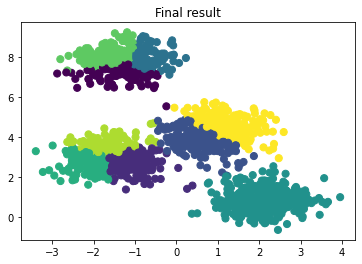

In [92]:
start = time()

preds = 0
for k in range(2, 10):
    print(f"================= k = {k} =================")
    start = time()
    model = KMeans(k)
    preds = model.predict(X)
    print(f"Fit and predict time: {time() - start}")
    
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")